In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from keras.optimizers import Optimizer
from keras import optimizers

In [ ]:
df = pd.read_excel("/content/crop_train.xls")

In [ ]:
df.head()

,Unnamed: 0,State,District,Year,Season,Crop,Area,Production,Temperature,Rainfall,Humidity,Wind Speed
0,0,Chhattisgarh,balod,2011,Kharif,Arhar/Tur,607,290.0,25.5025,9.856148,83.805,2.11
1,1,Chhattisgarh,balod,2011,Kharif,Horse-gram,288,102.0,25.5025,9.856148,83.805,2.11
2,2,Chhattisgarh,balod,2011,Kharif,Jowar,11,8.0,25.5025,9.856148,83.805,2.11
3,3,Chhattisgarh,balod,2011,Kharif,Maize,125,149.0,25.5025,9.856148,83.805,2.11
4,4,Chhattisgarh,balod,2011,Kharif,Mesta,8,15.0,25.5025,9.856148,83.805,2.11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10709 entries, 0 to 10708
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10709 non-null  int64  
 1   State        10709 non-null  object 
 2   District     10709 non-null  object 
 3   Year         10709 non-null  int64  
 4   Season       10709 non-null  object 
 5   Crop         10709 non-null  object 
 6   Area         10709 non-null  int64  
 7   Production   10368 non-null  float64
 8   Temperature  10709 non-null  float64
 9   Rainfall     10709 non-null  float64
 10  Humidity     10709 non-null  float64
 11  Wind Speed   10709 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1004.1+ KB


In [ ]:
df.describe()

,Unnamed: 0,Year,Area,Production,Temperature,Rainfall,Humidity,Wind Speed
count,10709.000000,10709.000000,10709.000000,1.036800e+04,10709.000000,10709.000000,10709.000000,10709.000000
mean,5354.000000,2007.727426,7754.194042,9.736874e+03,24.647882,4.631773,68.128860,1.851537
std,3091.566351,4.396948,38147.615088,5.902254e+04,2.698674,3.440207,15.337771,0.349847
min,0.000000,2000.000000,1.000000,0.000000e+00,17.564000,0.078581,24.520000,0.916000
25%,2677.000000,2004.000000,32.000000,2.800000e+01,22.224000,0.672380,55.396000,1.528000
50%,5354.000000,2008.000000,230.000000,1.740000e+02,25.330000,4.335726,67.140739,1.925000
75%,8031.000000,2012.000000,1303.000000,9.222500e+02,26.370000,7.627804,83.560000,2.107290
max,10708.000000,2014.000000,545965.000000,2.129180e+06,32.356667,11.850688,88.922500,2.700000


In [ ]:
type(np.unique(df['Production'])[-1])

numpy.float64

In [ ]:
df[(np.isnan(df['Production']))]

,Unnamed: 0,State,District,Year,Season,Crop,Area,Production,Temperature,Rainfall,Humidity,Wind Speed
74,74,Chhattisgarh,balod,2013,Kharif,Other Kharif pulses,141,NaN,25.3575,10.151371,87.4975,2.4050
91,91,Chhattisgarh,balod,2013,Rabi,Safflower,1,NaN,21.3720,0.108918,57.5540,1.4400
121,121,Chhattisgarh,balod,2014,Rabi,Other Rabi pulses,1,NaN,20.4540,0.520286,62.9440,1.4180
141,141,Chhattisgarh,baloda bazar,2011,Kharif,Mesta,17,NaN,26.0800,9.382960,83.2575,1.8850
222,222,Chhattisgarh,baloda bazar,2013,Kharif,Sunflower,60,NaN,26.1350,10.084793,85.7350,1.9475
...,...,...,...,...,...,...,...,...,...,...,...,...
10599,10599,Chhattisgarh,surguja,2012,Kharif,Jute,21,NaN,24.5850,9.418030,83.5825,1.7175
10636,10636,Chhattisgarh,surguja,2013,Kharif,Jute,15,NaN,24.9050,10.079675,86.0000,1.8550
10641,10641,Chhattisgarh,surguja,2013,Kharif,Other Kharif pulses,136,NaN,24.9050,10.079675,86.0000,1.8550
10674,10674,Chhattisgarh,surguja,2014,Kharif,Jute,13,NaN,25.1150,7.945099,82.3250,1.8700


In [ ]:
sum(df['Production'].isna())

341

In [ ]:
df.fillna(0,axis=1,inplace=True)

In [ ]:
sum(df['Production'].isna())

0

In [ ]:
df.describe().iloc[:,2]

count     10709.000000
mean       7754.194042
std       38147.615088
min           1.000000
25%          32.000000
50%         230.000000
75%        1303.000000
max      545965.000000
Name: Area, dtype: float64

In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
cr = LabelEncoder()
se = LabelEncoder()
dis = LabelEncoder()
df['Season'] = se.fit_transform(df['Season'])
df['Crop'] = cr.fit_transform(df['Crop'])
df['District'] = dis.fit_transform(df['District'])

In [ ]:
df.drop(['State','Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.head()

,District,Year,Season,Crop,Area,Production,Temperature,Rainfall,Humidity,Wind Speed
0,0,2011,0,0,607,290.0,25.5025,9.856148,83.805,2.11
1,0,2011,0,14,288,102.0,25.5025,9.856148,83.805,2.11
2,0,2011,0,15,11,8.0,25.5025,9.856148,83.805,2.11
3,0,2011,0,19,125,149.0,25.5025,9.856148,83.805,2.11
4,0,2011,0,21,8,15.0,25.5025,9.856148,83.805,2.11


In [ ]:
X=df.drop(['Production'],axis=1)

In [ ]:
Y=df['Production']

In [ ]:
import seaborn as sns

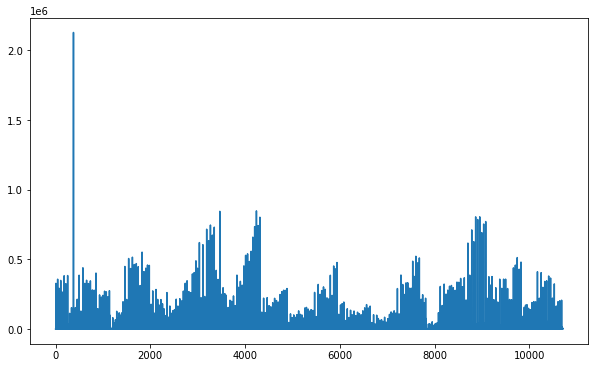

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(Y)
plt.show()

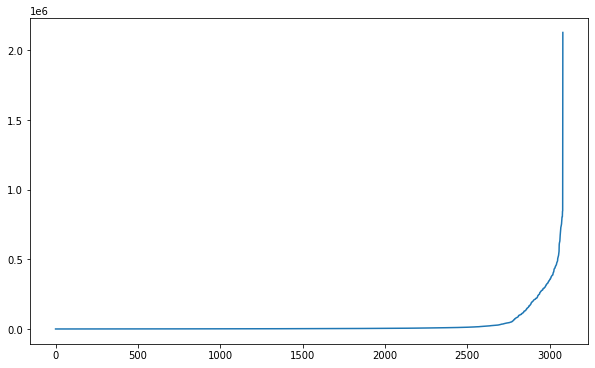

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.unique(Y))
plt.show()

In [ ]:
y_hat=np.log1p(Y)

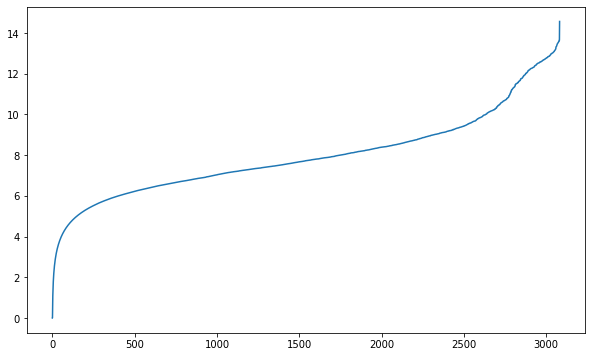

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.unique(y_hat))
plt.show()

In [ ]:
Y=y_hat

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (8031, 9) (8031,)
Test (2678, 9) (2678,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
maerandom = mean_absolute_error(y_test, y_pred)
maerandom

0.34274530292948474

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8031, 9), (8031,), (2678, 9), (2678,))

In [ ]:
scaler = StandardScaler()
x_trainscaled = scaler.fit_transform(x_train)
x_testscaled = scaler.transform(x_test)

In [ ]:
clf1=RandomForestRegressor()
clf1.fit(x_trainscaled,y_train)

RandomForestRegressor()

In [ ]:
ypredranscaled=clf1.predict(x_testscaled)
maerandomscaled = mean_absolute_error(ypredranscaled,y_test)
maerandomscaled

0.3419983025440185

In [ ]:
randommeanlist = [maerandom, maerandomscaled]
namerandom = ['Non Scaled', 'Scaled']

Text(0, 0.5, 'Mean Absolute Error')

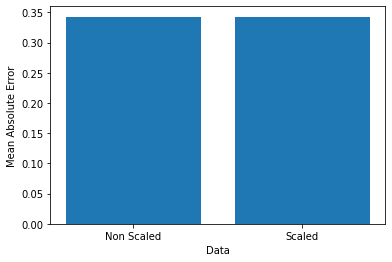

In [ ]:
plt.bar(namerandom,randommeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim = 9, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(x_trainscaled, y_train, epochs=100, batch_size=50)

Epoch 1/100
161/161 [==============================] - 1s 3ms/step - loss: 2.2296
Epoch 2/100
161/161 [==============================] - 0s 3ms/step - loss: 1.9535
Epoch 3/100
161/161 [==============================] - 0s 3ms/step - loss: 1.8681
Epoch 4/100
161/161 [==============================] - 0s 3ms/step - loss: 1.7438
Epoch 5/100
161/161 [==============================] - 1s 3ms/step - loss: 1.6531
Epoch 6/100
161/161 [==============================] - 1s 3ms/step - loss: 1.5935
Epoch 7/100
161/161 [==============================] - 1s 3ms/step - loss: 1.5139
Epoch 8/100
161/161 [==============================] - 0s 3ms/step - loss: 1.4594
Epoch 9/100
161/161 [==============================] - 1s 3ms/step - loss: 1.4039
Epoch 10/100
161/161 [==============================] - 1s 3ms/step - loss: 1.3708
Epoch 11/100
161/161 [==============================] - 1s 3ms/step - loss: 1.3232
Epoch 12/100
161/161 [==============================] - 1s 3ms/step - loss: 1.2901
Epoch 13/100


In [ ]:
ypredkeras = model.predict(x_testscaled)
maekeras_scaled=mean_absolute_error(y_test, ypredkeras)

In [ ]:
model1 = Sequential()
model1.add(Dense(256, input_dim = 9, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='relu'))
model1.compile(loss='mean_absolute_error', optimizer='adam')

In [ ]:
model1.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
126/126 [==============================] - 1s 3ms/step - loss: 23.6232
Epoch 2/100
126/126 [==============================] - 0s 3ms/step - loss: 5.0620
Epoch 3/100
126/126 [==============================] - 0s 3ms/step - loss: 5.0620
Epoch 4/100
126/126 [==============================] - 0s 3ms/step - loss: 5.0620
Epoch 5/100
126/126 [==============================] - 0s 3ms/step - loss: 5.0620
Epoch 6/100
126/126 [==============================] - 0s 3ms/step - loss: 5.0620
Epoch 7/100
126/126 [==============================] - 0s 3ms/step - loss: 5.0620
Epoch 8/100
126/126 [==============================] - 0s 3ms/step - loss: 5.0620
Epoch 9/100
126/126 [==============================] - 0s 3ms/step - loss: 5.0620
Epoch 10/100
126/126 [==============================] - 0s 3ms/step - loss: 5.0620
Epoch 11/100
126/126 [==============================] - 0s 3ms/step - loss: 5.0620
Epoch 12/100
126/126 [==============================] - 0s 3ms/step - loss: 5.0620
Epoch 13/100

In [ ]:
ypredkeras1 = model1.predict(x_test)
maekeras=mean_absolute_error(y_test, ypredkeras1)

Text(0, 0.5, 'Mean Absolute Error')

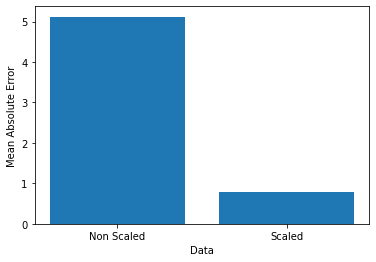

In [ ]:
kerasmeanlist = [maekeras, maekeras_scaled]
namerandom = ['Non Scaled', 'Scaled']
plt.bar(namerandom,kerasmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
rfc = RandomForestRegressor()
para_grid = {
    'n_estimators' : [20, 50, 100], 
}
cv_rfc = GridSearchCV(estimator = rfc, param_grid = para_grid, cv = 3)
cv_rfc.fit(x_trainscaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [20, 50, 100]})

In [ ]:
yp1=cv_rfc.predict(x_testscaled)

In [ ]:
mae1=mean_absolute_error(yp1,y_test)
mae1

0.34463343711680644

Text(0, 0.5, 'Mean Absolute Error')

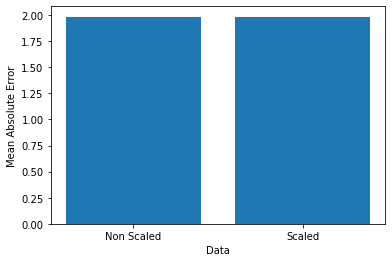

In [ ]:
from sklearn.linear_model import LinearRegression
clf_linear = LinearRegression()
clf_linear.fit(x_train, y_train)
ypredlinear = clf_linear.predict(x_test)
maelinear=mean_absolute_error(y_test, ypredlinear)
# on scaled data:
clf_linearscaled = LinearRegression()
clf_linearscaled.fit(x_trainscaled, y_train)
ypredlinearscaled = clf_linearscaled.predict(x_testscaled)
maelinearscaled=mean_absolute_error(y_test, ypredlinearscaled)
linearmeanlist = [maelinear, maelinearscaled]
namerandom = ['Non Scaled', 'Scaled']
plt.bar(namerandom,linearmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

Text(0, 0.5, 'Mean Absolute Error')

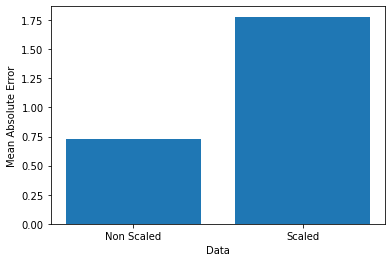

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
clfKNN = KNeighborsRegressor(n_neighbors = 3, algorithm = 'ball_tree')
clfKNN.fit(x_train, y_train)
ypredknn = clfKNN.predict(x_test)
knnmae=mean_absolute_error(y_test, ypredknn)
clfKNN1 = KNeighborsRegressor(n_neighbors = 3, algorithm = 'ball_tree')
clfKNN1.fit(x_trainscaled, y_train)
ypredknnscaled = clfKNN1.predict(x_testscaled)
knnmaescaled=mean_absolute_error(y_test, ypredknnscaled)
knnmeanlist = [knnmae, knnmaescaled]
namerandom = ['Non Scaled', 'Scaled']
plt.bar(namerandom,knnmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
x_ax = []
y_ax = []
for i in range(1, 50, 2):
    clfk = KNeighborsRegressor(n_neighbors = i, algorithm='ball_tree')
    clfk.fit(x_trainscaled, y_train)
    ypredk = clfk.predict(x_testscaled)
    mae = mean_absolute_error(y_test, ypredk)
    print(mae)
    x_ax.append(i)
    y_ax.append(mae)

2.205803099081464
1.7805099195676586
1.6958237014789745
1.693954969504183
1.6961133217784
1.7128980907497418
1.7106364631285738
1.7190955688121776
1.7233124031623608
1.7285824011099502
1.7336631406556446
1.7394618329143925
1.7462115073085749
1.752213550002383
1.759059952779002
1.765241396027854
1.7705351779756477
1.776180326542933
1.781066824487234
1.7861506375405256
1.7891839991106018
1.7923602716190916
1.7976520513278014
1.803600264086046
1.8089041654054037


Text(0, 0.5, 'Mean Absolute Error')

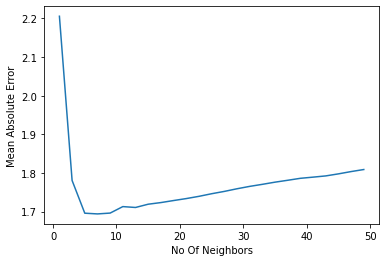

In [ ]:
plt.plot(x_ax,y_ax)
plt.xlabel('No Of Neighbors')
plt.ylabel('Mean Absolute Error')

In [ ]:
from sklearn.linear_model import SGDRegressor
clfsgd1=SGDRegressor()
clfsgd1.fit(x_trainscaled,y_train)

SGDRegressor()

In [ ]:
ypredsgdscaled=clfsgd1.predict(x_testscaled)
maesgdscaled=mean_absolute_error(ypredsgdscaled,y_test)
clfsgd2=SGDRegressor()
clfsgd2.fit(x_train,y_train)

SGDRegressor()

Text(0, 0.5, 'Mean Absolute Error')

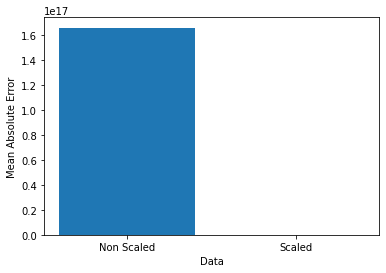

In [ ]:
ypredsgd=clfsgd2.predict(x_test)
maesgd=mean_absolute_error(ypredsgd,y_test)
sgdmeanlist = [maesgd, maesgdscaled]
namerandom = ['Non Scaled', 'Scaled']
plt.bar(namerandom,sgdmeanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

In [ ]:
maesgd,maesgdscaled

(1.6620122379237296e+17, 1.9818359536217514)

In [ ]:
meanlist = [maelinear, maekeras,maerandom,knnmae,]
name = ['Linear Regression', 'Keras','Random Forest','KNN']

Text(0, 0.5, 'Mean Absolute Error')

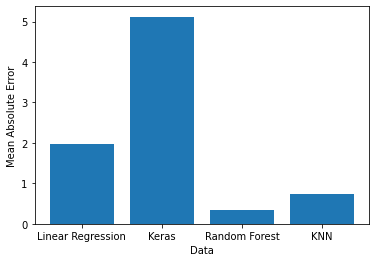

In [ ]:
plt.bar(name,meanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

Text(0, 0.5, 'Mean Absolute Error')

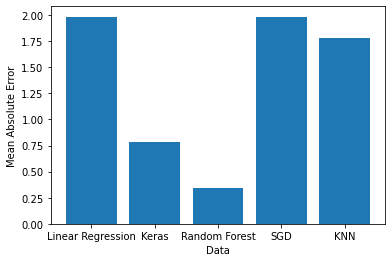

In [ ]:
meanlistscaled = [maelinearscaled, maekeras_scaled,maerandomscaled,maesgdscaled,knnmaescaled]
name = ['Linear Regression', 'Keras','Random Forest','SGD','KNN']
plt.bar(name,meanlistscaled)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")

Text(0, 0.5, 'Production')

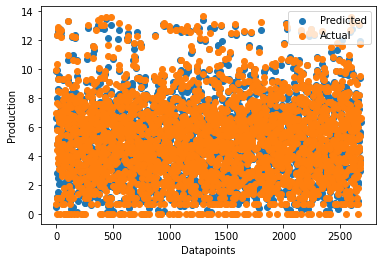

In [ ]:
num=[]
for i in range(x_testscaled.shape[0]):
    num.append(i+1)
plt.scatter(num,ypredranscaled,label="Predicted")
plt.scatter(num,y_test,label="Actual")
plt.legend()
plt.xlabel("Datapoints")
plt.ylabel("Production")

In [ ]:
df=pd.read_excel('/content/crop_train.xls')
df.head()

,Unnamed: 0,State,District,Year,Season,Crop,Area,Production,Temperature,Rainfall,Humidity,Wind Speed
0,0,Chhattisgarh,balod,2011,Kharif,Arhar/Tur,607,290.0,25.5025,9.856148,83.805,2.11
1,1,Chhattisgarh,balod,2011,Kharif,Horse-gram,288,102.0,25.5025,9.856148,83.805,2.11
2,2,Chhattisgarh,balod,2011,Kharif,Jowar,11,8.0,25.5025,9.856148,83.805,2.11
3,3,Chhattisgarh,balod,2011,Kharif,Maize,125,149.0,25.5025,9.856148,83.805,2.11
4,4,Chhattisgarh,balod,2011,Kharif,Mesta,8,15.0,25.5025,9.856148,83.805,2.11


In [ ]:
df.drop(['State'],axis=1,inplace=True)

In [ ]:
sum(df['Production'].isna())

341

In [ ]:
df.fillna(0,axis=1,inplace=True)

In [ ]:
df.head()

,Unnamed: 0,District,Year,Season,Crop,Area,Production,Temperature,Rainfall,Humidity,Wind Speed
0,0,balod,2011,Kharif,Arhar/Tur,607,290.0,25.5025,9.856148,83.805,2.11
1,1,balod,2011,Kharif,Horse-gram,288,102.0,25.5025,9.856148,83.805,2.11
2,2,balod,2011,Kharif,Jowar,11,8.0,25.5025,9.856148,83.805,2.11
3,3,balod,2011,Kharif,Maize,125,149.0,25.5025,9.856148,83.805,2.11
4,4,balod,2011,Kharif,Mesta,8,15.0,25.5025,9.856148,83.805,2.11


In [ ]:
test=df.drop(['Production'],axis=1)

In [ ]:
test.head(15)

,Unnamed: 0,District,Year,Season,Crop,Area,Temperature,Rainfall,Humidity,Wind Speed
0,0,balod,2011,Kharif,Arhar/Tur,607,25.5025,9.856148,83.805,2.110
1,1,balod,2011,Kharif,Horse-gram,288,25.5025,9.856148,83.805,2.110
2,2,balod,2011,Kharif,Jowar,11,25.5025,9.856148,83.805,2.110
3,3,balod,2011,Kharif,Maize,125,25.5025,9.856148,83.805,2.110
4,4,balod,2011,Kharif,Mesta,8,25.5025,9.856148,83.805,2.110
5,5,balod,2011,Kharif,Moong(Green Gram),46,25.5025,9.856148,83.805,2.110
6,6,balod,2011,Kharif,Other Kharif pulses,218,25.5025,9.856148,83.805,2.110
7,7,balod,2011,Kharif,Ragi,4,25.5025,9.856148,83.805,2.110
8,8,balod,2011,Kharif,Rice,177115,25.5025,9.856148,83.805,2.110
9,9,balod,2011,Kharif,Sesamum,291,25.5025,9.856148,83.805,2.110


In [ ]:
test.head()

,Unnamed: 0,District,Year,Season,Crop,Area,Temperature,Rainfall,Humidity,Wind Speed
0,0,balod,2011,Kharif,Arhar/Tur,607,25.5025,9.856148,83.805,2.11
1,1,balod,2011,Kharif,Horse-gram,288,25.5025,9.856148,83.805,2.11
2,2,balod,2011,Kharif,Jowar,11,25.5025,9.856148,83.805,2.11
3,3,balod,2011,Kharif,Maize,125,25.5025,9.856148,83.805,2.11
4,4,balod,2011,Kharif,Mesta,8,25.5025,9.856148,83.805,2.11


In [ ]:
testf = pd.DataFrame()
#district	year	season	crop	area	temp	rainfall	humidity	wind
testf = testf.assign(district = test["District"])
testf = testf.assign(year = test["Year"])
testf = testf.assign(season = test["Season"])
testf = testf.assign(crop = test["Crop"])
testf = testf.assign(area = test["Area"])
testf = testf.assign(temp = test["Temperature"])
testf = testf.assign(rainfall = test["Rainfall"])
testf = testf.assign(humidity = test["Humidity"])
testf = testf.assign(wind = test["Wind Speed"])

In [ ]:
testf.head(10)

,district,year,season,crop,area,temp,rainfall,humidity,wind
0,balod,2011,Kharif,Arhar/Tur,607,25.5025,9.856148,83.805,2.11
1,balod,2011,Kharif,Horse-gram,288,25.5025,9.856148,83.805,2.11
2,balod,2011,Kharif,Jowar,11,25.5025,9.856148,83.805,2.11
3,balod,2011,Kharif,Maize,125,25.5025,9.856148,83.805,2.11
4,balod,2011,Kharif,Mesta,8,25.5025,9.856148,83.805,2.11
5,balod,2011,Kharif,Moong(Green Gram),46,25.5025,9.856148,83.805,2.11
6,balod,2011,Kharif,Other Kharif pulses,218,25.5025,9.856148,83.805,2.11
7,balod,2011,Kharif,Ragi,4,25.5025,9.856148,83.805,2.11
8,balod,2011,Kharif,Rice,177115,25.5025,9.856148,83.805,2.11
9,balod,2011,Kharif,Sesamum,291,25.5025,9.856148,83.805,2.11


In [ ]:
testf.head()

,district,year,season,crop,area,temp,rainfall,humidity,wind
0,balod,2011,Kharif,Arhar/Tur,607,25.5025,9.856148,83.805,2.11
1,balod,2011,Kharif,Horse-gram,288,25.5025,9.856148,83.805,2.11
2,balod,2011,Kharif,Jowar,11,25.5025,9.856148,83.805,2.11
3,balod,2011,Kharif,Maize,125,25.5025,9.856148,83.805,2.11
4,balod,2011,Kharif,Mesta,8,25.5025,9.856148,83.805,2.11


In [ ]:
testf['season'] = se.transform(testf['season'])
testf['crop'] = cr.transform(testf['crop'])
testf['district']=dis.transform(testf['district'])

In [ ]:
print("Enter name of district: ")
name = input()

Enter name of district: 
balod


In [ ]:
name = name.lower()
name

'balod'

In [ ]:
encode=np.unique(testf['district'])

In [ ]:
testf.head()

,district,year,season,crop,area,temp,rainfall,humidity,wind
0,0,2011,0,0,607,25.5025,9.856148,83.805,2.11
1,0,2011,0,14,288,25.5025,9.856148,83.805,2.11
2,0,2011,0,15,11,25.5025,9.856148,83.805,2.11
3,0,2011,0,19,125,25.5025,9.856148,83.805,2.11
4,0,2011,0,21,8,25.5025,9.856148,83.805,2.11


In [ ]:
districts=list(np.unique(df['District']))

In [ ]:
districts

['balod',
 'baloda bazar',
 'balrampur',
 'bastar',
 'bemetara',
 'bijapur',
 'bilaspur',
 'dantewada',
 'dhamtari',
 'durg',
 'gariyaband',
 'janjgir-champa',
 'jashpur',
 'kabirdham',
 'kanker',
 'kondagaon',
 'korba',
 'korea',
 'mahasamund',
 'mungeli',
 'narayanpur',
 'raigarh',
 'raipur',
 'rajnandgaon',
 'sukma',
 'surajpur',
 'surguja']

In [ ]:
districts.index(name)

0

In [ ]:
testf.head()

,district,year,season,crop,area,temp,rainfall,humidity,wind
0,0,2011,0,0,607,25.5025,9.856148,83.805,2.11
1,0,2011,0,14,288,25.5025,9.856148,83.805,2.11
2,0,2011,0,15,11,25.5025,9.856148,83.805,2.11
3,0,2011,0,19,125,25.5025,9.856148,83.805,2.11
4,0,2011,0,21,8,25.5025,9.856148,83.805,2.11


In [ ]:
test.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
len(test)

10709

In [ ]:
area=[]

In [ ]:
df=testf.loc[0]
df=np.array(df)
df=df.reshape((1,9))
area.append((testf.loc[0][4],testf.loc[0][3]))

In [ ]:
area

[(607.0, 0.0)]

In [ ]:
x=[]

In [ ]:
df=pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8
0,0.0,2011.0,0.0,0.0,607.0,25.5025,9.856148,83.805,2.11


In [ ]:
x.append(df)

In [ ]:
x

[     0       1    2    3      4        5         6       7     8
 0  0.0  2011.0  0.0  0.0  607.0  25.5025  9.856148  83.805  2.11]

In [ ]:
test.head()

,District,Year,Season,Crop,Area,Temperature,Rainfall,Humidity,Wind Speed
0,balod,2011,Kharif,Arhar/Tur,607,25.5025,9.856148,83.805,2.11
1,balod,2011,Kharif,Horse-gram,288,25.5025,9.856148,83.805,2.11
2,balod,2011,Kharif,Jowar,11,25.5025,9.856148,83.805,2.11
3,balod,2011,Kharif,Maize,125,25.5025,9.856148,83.805,2.11
4,balod,2011,Kharif,Mesta,8,25.5025,9.856148,83.805,2.11


In [ ]:
x = []
area = []
for i in range(10709):
  if(test.loc[i][0] == name):
    df=testf.loc[i]
    df=np.array(df)
    df=df.reshape((1,9))
    area.append((testf.loc[i][4],testf.loc[i][3]))
    df=pd.DataFrame(df)
    x.append(df)

In [ ]:
x

[     0       1    2    3      4        5         6       7     8
 0  0.0  2011.0  0.0  0.0  607.0  25.5025  9.856148  83.805  2.11,
      0       1    2     3      4        5         6       7     8
 0  0.0  2011.0  0.0  14.0  288.0  25.5025  9.856148  83.805  2.11,
      0       1    2     3     4        5         6       7     8
 0  0.0  2011.0  0.0  15.0  11.0  25.5025  9.856148  83.805  2.11,
      0       1    2     3      4        5         6       7     8
 0  0.0  2011.0  0.0  19.0  125.0  25.5025  9.856148  83.805  2.11,
      0       1    2     3    4        5         6       7     8
 0  0.0  2011.0  0.0  21.0  8.0  25.5025  9.856148  83.805  2.11,
      0       1    2     3     4        5         6       7     8
 0  0.0  2011.0  0.0  22.0  46.0  25.5025  9.856148  83.805  2.11,
      0       1    2     3      4        5         6       7     8
 0  0.0  2011.0  0.0  26.0  218.0  25.5025  9.856148  83.805  2.11,
      0       1    2     3    4        5         6       7     8


In [ ]:
df_yield = pd.concat(x)
df_yield

,0,1,2,3,4,5,6,7,8
0,0.0,2011.0,0.0,0.0,607.0,25.502500,9.856148,83.805000,2.11000
0,0.0,2011.0,0.0,14.0,288.0,25.502500,9.856148,83.805000,2.11000
0,0.0,2011.0,0.0,15.0,11.0,25.502500,9.856148,83.805000,2.11000
0,0.0,2011.0,0.0,19.0,125.0,25.502500,9.856148,83.805000,2.11000
0,0.0,2011.0,0.0,21.0,8.0,25.502500,9.856148,83.805000,2.11000
...,...,...,...,...,...,...,...,...,...
0,0.0,2014.0,3.0,15.0,11.0,27.718462,4.105974,68.549193,2.32669
0,0.0,2014.0,3.0,24.0,5.0,27.718462,4.105974,68.549193,2.32669
0,0.0,2014.0,3.0,38.0,354.0,27.718462,4.105974,68.549193,2.32669
0,0.0,2014.0,3.0,40.0,1.0,27.718462,4.105974,68.549193,2.32669


In [ ]:
x=df_yield.values
x

array([[   0.        , 2011.        ,    0.        , ...,    9.85614785,
          83.805     ,    2.11      ],
       [   0.        , 2011.        ,    0.        , ...,    9.85614785,
          83.805     ,    2.11      ],
       [   0.        , 2011.        ,    0.        , ...,    9.85614785,
          83.805     ,    2.11      ],
       ...,
       [   0.        , 2014.        ,    3.        , ...,    4.10597443,
          68.54919263,    2.32668972],
       [   0.        , 2014.        ,    3.        , ...,    4.10597443,
          68.54919263,    2.32668972],
       [   0.        , 2014.        ,    3.        , ...,    4.10597443,
          68.54919263,    2.32668972]])

In [ ]:

#area	rainfall	season	temp	crop	humidity	wind	district	year
#district	year	season	crop	area	temp	rainfall	humidity	wind

x=scaler.transform(x)
ypred = clf1.predict(x)
ypred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([ 5.43003118,  4.88117165,  2.29478336,  4.91695524,  2.62590445,
        2.53732415,  1.70487954,  1.09716077, 12.58908979,  4.58892208,
        5.90231324,  4.46407456,  2.73236793,  5.87256626,  1.12386515,
        8.94205463,  2.99459163, 10.09131704,  7.36197694,  4.17355156,
        3.38799586,  2.92631069,  5.0456141 ,  6.10146588,  1.81084449,
        5.63183315,  8.27410324,  6.17524936,  4.50781377,  2.68378911,
        0.74100012,  3.55111609,  0.9389197 ,  5.07318701,  3.86785242,
        5.6579205 ,  5.05084575,  2.45124495,  4.90350112,  3.14787743,
        2.16245833,  0.99975694,  3.42427885,  1.36512433, 12.80647561,
        4.37309338,  5.84987742,  4.27484174,  2.26253825,  5.97708767,
        9.01205344,  3.09356355,  9.99385408,  7.37517411,  5.01444091,
        3.58491301,  2.59735657,  5.00072344,  6.00538714,  3.25853393,
        5.60108864,  8.20168545,  5.05721458,  4.41632905,  3.01587843,
        2.97612131,  6.56855945,  3.94339243,  0.80420398,  5.61

In [ ]:
type(ypred), type(area)

(numpy.ndarray, list)

In [ ]:
ypred.shape, len(area)

((135,), 135)

In [ ]:
area

[(607.0, 0.0),
 (288.0, 14.0),
 (11.0, 15.0),
 (125.0, 19.0),
 (8.0, 21.0),
 (46.0, 22.0),
 (218.0, 26.0),
 (4.0, 30.0),
 (177115.0, 32.0),
 (291.0, 35.0),
 (1448.0, 36.0),
 (136.0, 37.0),
 (37.0, 39.0),
 (1261.0, 43.0),
 (3.0, 3.0),
 (7467.0, 11.0),
 (66.0, 14.0),
 (50711.0, 17.0),
 (4365.0, 18.0),
 (797.0, 20.0),
 (185.0, 22.0),
 (838.0, 25.0),
 (473.0, 28.0),
 (1154.0, 31.0),
 (15.0, 33.0),
 (1088.0, 43.0),
 (3664.0, 44.0),
 (16.0, 2.0),
 (284.0, 6.0),
 (25.0, 8.0),
 (1.0, 9.0),
 (10.0, 24.0),
 (1.0, 34.0),
 (42.0, 38.0),
 (7.0, 40.0),
 (571.0, 0.0),
 (274.0, 14.0),
 (12.0, 15.0),
 (121.0, 19.0),
 (14.0, 21.0),
 (32.0, 22.0),
 (5.0, 23.0),
 (92.0, 26.0),
 (7.0, 30.0),
 (177182.0, 32.0),
 (271.0, 35.0),
 (1333.0, 36.0),
 (121.0, 37.0),
 (17.0, 39.0),
 (1296.0, 43.0),
 (7910.0, 11.0),
 (74.0, 14.0),
 (50638.0, 17.0),
 (4276.0, 18.0),
 (776.0, 20.0),
 (168.0, 22.0),
 (39.0, 25.0),
 (473.0, 28.0),
 (1118.0, 31.0),
 (111.0, 33.0),
 (1125.0, 43.0),
 (3572.0, 44.0),
 (9.0, 2.0),
 (233.0, 6

In [ ]:
yld = []
cnt=0
for i, j in area:
    yld.append((ypred[cnt] / i , j))
    cnt+=1

In [ ]:
yld

[(0.008945685633547619, 0.0),
 (0.016948512658074413, 14.0),
 (0.20861666932127385, 15.0),
 (0.03933564195095826, 19.0),
 (0.3282380561970515, 21.0),
 (0.05515922060826796, 22.0),
 (0.007820548344309845, 26.0),
 (0.2742901924021856, 30.0),
 (7.10786200461451e-05, 32.0),
 (0.01576949167483513, 35.0),
 (0.004076183174739468, 36.0),
 (0.032824077663326845, 37.0),
 (0.07384778179278247, 39.0),
 (0.004657070781904811, 43.0),
 (0.3746217159741591, 3.0),
 (0.0011975431401622541, 11.0),
 (0.04537260044603306, 14.0),
 (0.00019899660904532744, 17.0),
 (0.0016865926556226055, 18.0),
 (0.005236576617521595, 20.0),
 (0.018313491140104016, 22.0),
 (0.0034920175317297818, 25.0),
 (0.010667260263911304, 28.0),
 (0.0052872321325777355, 31.0),
 (0.12072296620969719, 33.0),
 (0.005176317236978579, 43.0),
 (0.0022582159499219064, 44.0),
 (0.38595308480210605, 2.0),
 (0.015872583699853157, 6.0),
 (0.10735156434101141, 8.0),
 (0.7410001247518682, 9.0),
 (0.35511160892518695, 24.0),
 (0.938919702447304, 34.0

In [ ]:
for i, j in yld:
    print(i, j)

0.008945685633547619 0.0
0.016948512658074413 14.0
0.20861666932127385 15.0
0.03933564195095826 19.0
0.3282380561970515 21.0
0.05515922060826796 22.0
0.007820548344309845 26.0
0.2742901924021856 30.0
7.10786200461451e-05 32.0
0.01576949167483513 35.0
0.004076183174739468 36.0
0.032824077663326845 37.0
0.07384778179278247 39.0
0.004657070781904811 43.0
0.3746217159741591 3.0
0.0011975431401622541 11.0
0.04537260044603306 14.0
0.00019899660904532744 17.0
0.0016865926556226055 18.0
0.005236576617521595 20.0
0.018313491140104016 22.0
0.0034920175317297818 25.0
0.010667260263911304 28.0
0.0052872321325777355 31.0
0.12072296620969719 33.0
0.005176317236978579 43.0
0.0022582159499219064 44.0
0.38595308480210605 2.0
0.015872583699853157 6.0
0.10735156434101141 8.0
0.7410001247518682 9.0
0.35511160892518695 24.0
0.938919702447304 34.0
0.12079016687104618 38.0
0.5525503454782621 40.0
0.00990879246736499 0.0
0.018433743610548607 14.0
0.20427041216824196 15.0
0.04052480267471371 19.0
0.22484838780

In [ ]:
kharif = []
cnt=0
for i, j in yld:
    if cnt == 3:
        break
    kharif.append((i, j))
    cnt+=1
cnt=1
rabi = []
for i, j in yld:
    if cnt<=3:
        cnt+=1
        continue
    rabi.append((i, j))

In [ ]:
len(kharif), len(rabi)

(3, 132)

In [ ]:
kharif.sort(reverse = True)
rabi.sort(reverse = True)
len(kharif), len(rabi)

(3, 132)

In [ ]:
kharif

[(0.20861666932127385, 15.0),
 (0.016948512658074413, 14.0),
 (0.008945685633547619, 0.0)]

In [ ]:
j=cr.inverse_transform([int(j)])
j

array(['Turmeric'], dtype=object)

In [ ]:
anskharif = []
for i, j in kharif:
    print(i, j)
    j_ = cr.inverse_transform([int(j)])
    anskharif.append((i, j_))
ansrabi = []
for i, j in rabi:
    j_ = cr.inverse_transform([int(j)])
    ansrabi.append((i, j_))

0.20861666932127385 15.0
0.016948512658074413 14.0
0.008945685633547619 0.0


In [ ]:
for i, j in anskharif:
    print("Crop: ",j," , ","Yield:", np.exp(i)-1 ,"weight(kg or tonne)/unit of area attribute")

Crop:  ['Jowar']  ,  Yield: 0.23197265509012532 weight(kg or tonne)/unit of area attribute
Crop:  ['Horse-gram']  ,  Yield: 0.01709295356441798 weight(kg or tonne)/unit of area attribute
Crop:  ['Arhar/Tur']  ,  Yield: 0.008985817860104772 weight(kg or tonne)/unit of area attribute


In [ ]:
for i, j in ansrabi:
    print("Crop: ",j," , ","Yield:", np.exp(i)-1)

Crop:  ['Sweet potato']  ,  Yield: 1.5809170171586484
Crop:  ['Sannhamp']  ,  Yield: 0.938919702447304
Crop:  ['Turmeric']  ,  Yield: 0.8428184976670617
Crop:  ['Turmeric']  ,  Yield: 0.8042039766915208
Crop:  ['Dry ginger']  ,  Yield: 0.7410001247518682
Crop:  ['Turmeric']  ,  Yield: 0.6819840190095734
Crop:  ['Onion']  ,  Yield: 0.6220645893852613
Crop:  ['Sweet potato']  ,  Yield: 0.5969487143767499
Crop:  ['Onion']  ,  Yield: 0.5952242628671014
Crop:  ['Banana']  ,  Yield: 0.5619127315612619
Crop:  ['Sweet potato']  ,  Yield: 0.5525503454782621
Crop:  ['Onion']  ,  Yield: 0.5119304516131022
Crop:  ['Banana']  ,  Yield: 0.4044742341557937
Crop:  ['Banana']  ,  Yield: 0.3979034233756772
Crop:  ['Sweet potato']  ,  Yield: 0.39433924274715665
Crop:  ['Banana']  ,  Yield: 0.38595308480210605
Crop:  ['Barley']  ,  Yield: 0.3746217159741591
Crop:  ['Onion']  ,  Yield: 0.35511160892518695
Crop:  ['Mesta']  ,  Yield: 0.3282380561970515
Crop:  ['Ragi']  ,  Yield: 0.2742901924021856
Crop:  ['